In [1]:
#CODE FOR LOADING THE DATASET "dataset_aueb_argument_v3.json"
import json
import pandas as pd

label2id = {
    'NONE': 0,
    'EVIDENCE': 1,
    'CLAIM': 2}

def load_corpus(path, label_mapping=None):
    with open(path) as fp:
        corpus = json.load(fp)

    documents, texts, labels = [], [], []
    for abstract in corpus:
        documents.append(abstract)
        texts.append(corpus[abstract]['sentences'])
        if isinstance(label_mapping, dict):
            labels.append(
                [label_mapping[str(l).upper()]
                    for l in corpus[abstract]['labels']])
        else:
            labels.append([str(l).upper() for l in corpus[abstract]['labels']])

    assert len(texts) == len(labels)
    data = pd.DataFrame(
        zip(documents, texts, labels),
        columns=['document', 'sentences', 'labels'])

    return data

data = load_corpus('dataset_aueb_argument_v3.json') #, label_mapping=label2id)
print(f'Dataset length: {len(data)} abstracts')
data.sample(5)

Dataset length: 1017 abstracts


,document,sentences,labels
106,doi: 10.1007/s10237-018-1081-0,[A multiscale model to predict current absolut...,"[NEITHER, NEITHER, NEITHER, NEITHER, NEITHER, ..."
500,doi: 10.1038/srep26085,[Putative histidine kinase inhibitors with ant...,"[NEITHER, NEITHER, NEITHER, NEITHER, NEITHER, ..."
355,doi: 10.1029/2018ms001383,[A Statistical Model for Isolated Convective P...,"[NEITHER, NEITHER, NEITHER, NEITHER, NEITHER, ..."
799,doi: 10.1186/s13071-017-2533-6,[Phenotypic and genotypic monitoring of Schist...,"[NEITHER, NEITHER, NEITHER, NEITHER, NEITHER, ..."
293,doi: 10.1021/acs.jcim.6b00780,[Evaluation and Characterization of Trk Kinase...,"[NEITHER, NEITHER, NEITHER, NEITHER, EVIDENCE,..."


In [2]:
#CODE FOR LOADING THE DATASET "dataset.json"
import json
import pandas as pd

label2id = {
    'NONE': 0,
    'EVIDENCE': 1,
    'CLAIM': 2}

def load_corpus(path, label_mapping=None):
    with open(path) as fp:
        corpus = json.load(fp)

    documents, texts, labels = [], [], []
    for abstract in corpus:
        documents.append(abstract)
        texts.append(corpus[abstract]['sentences'])
        if isinstance(label_mapping, dict):
            labels.append(
                [label_mapping[str(l).upper()]
                    for l in corpus[abstract]['labels']])
        else:
            labels.append([str(l).upper() for l in corpus[abstract]['labels']])

    assert len(texts) == len(labels)
    data = pd.DataFrame(
        zip(documents, texts, labels),
        columns=['document', 'sentences', 'labels'])

    return data

data2 = load_corpus('dataset.json') #, label_mapping=label2id)
print(f'Dataset length: {len(data2)} abstracts')
data2.sample(5)

Dataset length: 1669 abstracts


,document,sentences,labels
93,DIK_G2B1_44.txt,[Gender equality and global health: Intersecti...,"[NONE, NONE, NONE, NONE, NONE, NONE, NONE, EVI..."
7,DEI_G2B1_43.txt,[Gender (in)equality among employees in elder ...,"[NONE, NONE, NONE, NONE, NONE, NONE, NONE, NON..."
151,EIJ_G4B2_CorpusID_150783113.txt,[﻿Intergenerational Transmission of Female Gen...,"[NONE, NONE, NONE, NONE, NONE, NONE, NONE, NON..."
1362,16476841,[Early intervention with epoetin alfa during p...,"[NONE, NONE, NONE, NONE, EVIDENCE, EVIDENCE, E..."
1021,9807987,[Randomised trial of irinotecan plus supportiv...,"[NONE, NONE, NONE, NONE, NONE, NONE, NONE, EVI..."


In [3]:
#concatenate the 2 datasets
data_final = pd.concat([data,data2], ignore_index=True)

In [4]:
#Explode to sentences
sentences = data_final['sentences'].explode().reset_index().rename(
    columns={'index': 'doc_id', 'sentences': 'sentence'})
sentences

,doc_id,sentence
0,0,Concordance Between Different Amyloid Immunoas...
1,0,Importance Visual assessment of amyloid positr...
2,0,Several immunoassays have been developed to me...
3,0,The agreement between CSF Aβ42 measures from d...
4,0,Objective To determine the concordance between...
...,...,...
31999,2685,No statistically significant difference in con...
32000,2685,Latanoprost 0.005% once daily reduced IOP more...
32001,2685,Latanoprost had no statistically or clinically...
32002,2685,There was no difference in hyperemia between t...


In [5]:
#Explode to the corresponding labels
labels = data_final['labels'].explode().reset_index().rename(
    columns={'index': 'doc_id', 'labels': 'label'})
labels

,doc_id,label
0,0,NEITHER
1,0,NEITHER
2,0,NEITHER
3,0,NEITHER
4,0,NEITHER
...,...,...
31999,2685,EVIDENCE
32000,2685,NONE
32001,2685,CLAIM
32002,2685,CLAIM


In [6]:
#we drop the doc_id column as it is not needed
labels = labels.drop(['doc_id'],axis =1)

In [7]:
#we concatenate the 2 data frames into one
df = pd.concat([sentences,labels], axis =1, sort = False)

In [8]:
df['label'] = df['label'].replace('NONE','NEITHER')
df

,doc_id,sentence,label
0,0,Concordance Between Different Amyloid Immunoas...,NEITHER
1,0,Importance Visual assessment of amyloid positr...,NEITHER
2,0,Several immunoassays have been developed to me...,NEITHER
3,0,The agreement between CSF Aβ42 measures from d...,NEITHER
4,0,Objective To determine the concordance between...,NEITHER
...,...,...,...
31999,2685,No statistically significant difference in con...,EVIDENCE
32000,2685,Latanoprost 0.005% once daily reduced IOP more...,NEITHER
32001,2685,Latanoprost had no statistically or clinically...,CLAIM
32002,2685,There was no difference in hyperemia between t...,CLAIM


In [9]:
df = df[df["label"] == "CLAIM"]
df

,doc_id,sentence,label
15,0,Conclusions and Relevance Concentrations of CS...,CLAIM
16,0,These findings suggest the benefit of implemen...,CLAIM
30,1,The increases in both neurofilament light and ...,CLAIM
31,1,Further investigations will be required to stu...,CLAIM
32,1,These preliminary findings demand that we ques...,CLAIM
...,...,...,...
31976,2683,Because the efficacy of both drugs was equival...,CLAIM
31988,2684,Our study suggests that intraoperative topical...,CLAIM
32001,2685,Latanoprost had no statistically or clinically...,CLAIM
32002,2685,There was no difference in hyperemia between t...,CLAIM


In [10]:
import nltk

In [11]:
# converting all sentences to lowercase and replacing the "." with " "
#removing ' ' at the beginning or the end of each sentence
df['sentence'] = df['sentence'].str.lower().str.replace('.', ' ', regex=False).str.strip()
df.head()

<ipython-input-11-750b8515a9cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence'] = df['sentence'].str.lower().str.replace('.', ' ', regex=False).str.strip()


,doc_id,sentence,label
15,0,conclusions and relevance concentrations of cs...,CLAIM
16,0,these findings suggest the benefit of implemen...,CLAIM
30,1,the increases in both neurofilament light and ...,CLAIM
31,1,further investigations will be required to stu...,CLAIM
32,1,these preliminary findings demand that we ques...,CLAIM


In [12]:
# Concatenating all sentences into one text.
one_text = " ".join(df['sentence'])
print(one_text[:1000])

conclusions and relevance concentrations of csf aβ42 derived from the new immunoassays (modified innotest, fl, ei, and msd) may correlate better with the antibody-independent mass spectrometry–based reference measurement procedure and may show improved agreement with visual [18f]flutemetamol pet assessment when using the aβ42:aβ40 or aβ42:tau ratios these findings suggest the benefit of implementing the csf aβ42:aβ40 or aβ42:tau ratios as a biomarker of amyloid deposition in clinical practice and trials the increases in both neurofilament light and tau over 48 hours after surgery suggest that general anesthesia and surgery may be associated with neuronal damage in the short term further investigations will be required to study any association with clinical outcomes these preliminary findings demand that we question the prevailing assumption that anesthesia and surgery are innocuous, transient, and without injurious changes to the central nervous system this work suggests that faults mu

In [13]:
from collections import Counter

In [14]:
#we find the most common words
top_words = Counter(one_text.split()).most_common()
top_words[:20]

[('the', 3811),
 ('of', 3188),
 ('and', 2829),
 ('in', 2389),
 ('to', 1855),
 ('a', 1295),
 ('with', 1239),
 ('for', 969),
 ('that', 903),
 ('is', 793),
 ('be', 548),
 ('this', 530),
 ('as', 476),
 ('patients', 466),
 ('are', 436),
 ('on', 434),
 ('by', 378),
 ('an', 313),
 ('was', 296),
 ('these', 291)]

In [15]:
#we also use the english stop words from the nltk library
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [16]:
#we combine stop words and most common used words into a list in order to later remove them from our data frame.
most_common = top_words[:100]
words_to_exclude = most_common+stop
words_to_exclude = list(dict.fromkeys(words_to_exclude))

In [17]:
#we remove them and form a new column which contains the "clean" text
df['sentence_clean'] = df['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (words_to_exclude)]))

<ipython-input-17-31026e8da075>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence_clean'] = df['sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (words_to_exclude)]))


In [18]:
#we remove the older column which contained raw text
df = df.drop(['sentence'] ,axis =1)
df

,doc_id,label,sentence_clean
15,0,CLAIM,conclusions relevance concentrations csf aβ42 ...
16,0,CLAIM,findings suggest benefit implementing csf aβ42...
30,1,CLAIM,increases neurofilament light tau 48 hours sur...
31,1,CLAIM,investigations required study association clin...
32,1,CLAIM,preliminary findings demand question prevailin...
...,...,...,...
31976,2683,CLAIM,"efficacy drugs equivalent, identical safety pr..."
31988,2684,CLAIM,study suggests intraoperative topical 5-fu lea...
32001,2685,CLAIM,latanoprost statistically clinically significa...
32002,2685,CLAIM,difference hyperemia two regimens


In [19]:
#renaming column
df = df.rename(columns={'sentence_clean' :'sentence' })
df

,doc_id,label,sentence
15,0,CLAIM,conclusions relevance concentrations csf aβ42 ...
16,0,CLAIM,findings suggest benefit implementing csf aβ42...
30,1,CLAIM,increases neurofilament light tau 48 hours sur...
31,1,CLAIM,investigations required study association clin...
32,1,CLAIM,preliminary findings demand question prevailin...
...,...,...,...
31976,2683,CLAIM,"efficacy drugs equivalent, identical safety pr..."
31988,2684,CLAIM,study suggests intraoperative topical 5-fu lea...
32001,2685,CLAIM,latanoprost statistically clinically significa...
32002,2685,CLAIM,difference hyperemia two regimens


In [20]:
df = df.reset_index()
df = df.drop(['index'] ,axis =1)
df

,doc_id,label,sentence
0,0,CLAIM,conclusions relevance concentrations csf aβ42 ...
1,0,CLAIM,findings suggest benefit implementing csf aβ42...
2,1,CLAIM,increases neurofilament light tau 48 hours sur...
3,1,CLAIM,investigations required study association clin...
4,1,CLAIM,preliminary findings demand question prevailin...
...,...,...,...
3414,2683,CLAIM,"efficacy drugs equivalent, identical safety pr..."
3415,2684,CLAIM,study suggests intraoperative topical 5-fu lea...
3416,2685,CLAIM,latanoprost statistically clinically significa...
3417,2685,CLAIM,difference hyperemia two regimens


In [21]:
#import sentence transformer in order to extract sentence embeddings
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [22]:
#encode - create embeddings
w = model.encode(df['sentence'].to_list())
w

array([[ 0.07944556, -0.13983499,  0.2559097 , ..., -0.3365171 ,
         0.08810665, -0.05044956],
       [-0.05104524, -0.19844739,  0.3814912 , ..., -0.3370861 ,
         0.18207923,  0.07766331],
       [-0.17801069,  0.07708841,  0.40087444, ...,  0.13940105,
        -0.2726423 ,  0.04464674],
       ...,
       [-0.33181965,  0.32356647,  0.07595167, ...,  0.35534838,
         0.36835307, -0.1865687 ],
       [-0.8332986 ,  0.6184559 ,  0.21076702, ..., -0.62022346,
         0.4052251 , -0.54333985],
       [ 0.25262126,  0.07373051,  0.2956862 , ...,  0.28322208,
         0.04813986,  0.4163238 ]], dtype=float32)

In [23]:
#normalize w in order to put it as input to produce pairwise distances
normal_w = (w - w.min(axis=0)) / (w.max(axis=0) - w.min(axis=0))
normal_w

array([[0.53679675, 0.30840516, 0.61523545, ..., 0.3234051 , 0.48145753,
        0.45539352],
       [0.47903982, 0.2800621 , 0.68466103, ..., 0.3231332 , 0.51826656,
        0.5255801 ],
       [0.42284316, 0.41330218, 0.6953768 , ..., 0.5508304 , 0.34015223,
        0.507492  ],
       ...,
       [0.35476527, 0.5324909 , 0.5157488 , ..., 0.65402436, 0.59123003,
        0.38082072],
       [0.13280393, 0.6750897 , 0.59027916, ..., 0.18783134, 0.6056727 ,
        0.18536378],
       [0.61344665, 0.41167843, 0.6372252 , ..., 0.6195576 , 0.46580252,
        0.7111151 ]], dtype=float32)

In [24]:
from sklearn.metrics.pairwise import pairwise_distances

In [25]:
#creating the distance matrix from embeddings
distance_matrix = pairwise_distances(normal_w, Y=None, metric='euclidean')

In [26]:
import numpy as np

In [27]:
#normalizing distance_matrix
n_distance_matrix = (distance_matrix - distance_matrix.min(axis=0)) / (distance_matrix.max(axis=0) - distance_matrix.min(axis=0))
n_distance_matrix

array([[0.        , 0.4265082 , 0.6053887 , ..., 0.6113874 , 0.64751494,
        0.61246747],
       [0.46968216, 0.        , 0.6046207 , ..., 0.7527322 , 0.7446244 ,
        0.7574819 ],
       [0.70389384, 0.6383798 , 0.        , ..., 0.7636384 , 0.76736355,
        0.71486396],
       ...,
       [0.6789975 , 0.7591289 , 0.72940147, ..., 0.        , 0.6816532 ,
        0.653148  ],
       [0.83667874, 0.8737144 , 0.8527805 , ..., 0.7930867 , 0.        ,
        0.8656599 ],
       [0.68392843, 0.76810956, 0.68655956, ..., 0.65673095, 0.74811095,
        0.        ]], dtype=float32)

In [28]:
#creating the similarities
n_similarity_matrix = 1 - n_distance_matrix
n_similarity_matrix

array([[1.        , 0.5734918 , 0.3946113 , ..., 0.38861263, 0.35248506,
        0.38753253],
       [0.53031784, 1.        , 0.3953793 , ..., 0.24726778, 0.25537562,
        0.24251813],
       [0.29610616, 0.3616202 , 1.        , ..., 0.23636162, 0.23263645,
        0.28513604],
       ...,
       [0.32100248, 0.24087107, 0.27059853, ..., 1.        , 0.3183468 ,
        0.346852  ],
       [0.16332126, 0.12628561, 0.14721948, ..., 0.20691329, 1.        ,
        0.1343401 ],
       [0.31607157, 0.23189044, 0.31344044, ..., 0.34326905, 0.25188905,
        1.        ]], dtype=float32)

In [29]:
#keep only the main diagonal elements
n_similarity_matrix = np.triu(n_similarity_matrix)
n_similarity_matrix

array([[1.        , 0.5734918 , 0.3946113 , ..., 0.38861263, 0.35248506,
        0.38753253],
       [0.        , 1.        , 0.3953793 , ..., 0.24726778, 0.25537562,
        0.24251813],
       [0.        , 0.        , 1.        , ..., 0.23636162, 0.23263645,
        0.28513604],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.3183468 ,
        0.346852  ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.1343401 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]], dtype=float32)

In [30]:
#create a copy in order to plot a histogram
histog = n_similarity_matrix.copy()

In [31]:
#removing all values for lower triangular matrix
histog[np.tril_indices(histog.shape[0], -1)] = np.nan
histog

array([[1.        , 0.5734918 , 0.3946113 , ..., 0.38861263, 0.35248506,
        0.38753253],
       [       nan, 1.        , 0.3953793 , ..., 0.24726778, 0.25537562,
        0.24251813],
       [       nan,        nan, 1.        , ..., 0.23636162, 0.23263645,
        0.28513604],
       ...,
       [       nan,        nan,        nan, ..., 1.        , 0.3183468 ,
        0.346852  ],
       [       nan,        nan,        nan, ...,        nan, 1.        ,
        0.1343401 ],
       [       nan,        nan,        nan, ...,        nan,        nan,
        1.        ]], dtype=float32)

In [32]:
import matplotlib.pyplot as plt

In [33]:
plt.rcParams["figure.figsize"] = (20,10)

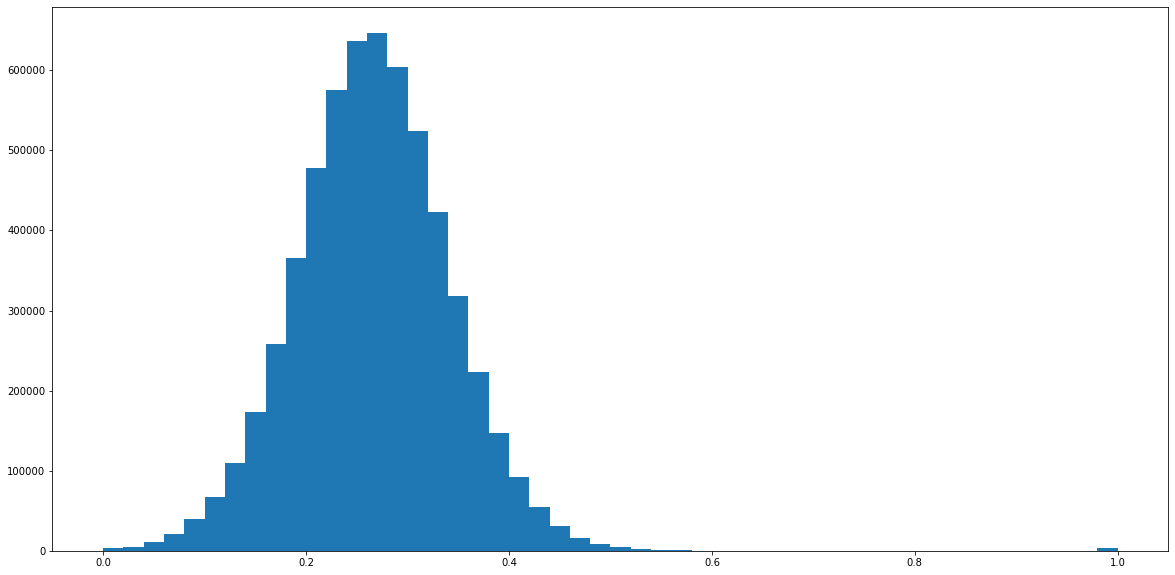

In [34]:
#plot the histogram in order to observe the distribution and pick a threshold
plt.hist(histog.flatten(),50)
plt.show()

In [35]:
#preview
test_df = pd.DataFrame(n_similarity_matrix)
test_df

,0,1,2,3,4,5,6,7,8,9,...,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418
0,1.0,0.573492,0.394611,0.403237,0.327663,0.274868,0.386639,0.350703,0.353865,0.328886,...,0.368466,0.340610,0.365591,0.268859,0.365942,0.369605,0.364513,0.388613,0.352485,0.387533
1,0.0,1.000000,0.395379,0.291725,0.202618,0.221322,0.276448,0.226037,0.263240,0.236886,...,0.287240,0.236369,0.205582,0.169793,0.245158,0.266605,0.270027,0.247268,0.255376,0.242518
2,0.0,0.000000,1.000000,0.234195,0.448737,0.248593,0.238901,0.211329,0.193512,0.204102,...,0.338548,0.330814,0.329952,0.296989,0.267174,0.348265,0.355286,0.236362,0.232636,0.285136
3,0.0,0.000000,0.000000,1.000000,0.276205,0.201515,0.233914,0.205311,0.191435,0.193415,...,0.217005,0.284560,0.290882,0.269088,0.284465,0.288718,0.219353,0.244218,0.293222,0.218282
4,0.0,0.000000,0.000000,0.000000,1.000000,0.344939,0.233065,0.301993,0.279820,0.325320,...,0.361294,0.369297,0.379479,0.390546,0.306681,0.318214,0.371950,0.335938,0.282157,0.308251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3414,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.411783,0.272922,0.209037,0.446657
3415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.271656,0.193980,0.419575
3416,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.318347,0.346852
3417,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.134340


In [36]:
#creating list with uper triangular vaues of similarity matrix
stats_list = test_df.stack().tolist()

In [37]:
#creating list to check some statistic measures like mean and std and removing 0 values as we previously set all lower 
#triangular values to 0
stats_list = [i for i in stats_list if i != 0]
stats_list

[1.0,
 0.5734918117523193,
 0.39461129903793335,
 0.4032366871833801,
 0.3276631236076355,
 0.2748677730560303,
 0.38663893938064575,
 0.35070323944091797,
 0.3538653254508972,
 0.3288862705230713,
 0.46891558170318604,
 0.4018130898475647,
 0.3686456084251404,
 0.3951500654220581,
 0.3841179609298706,
 0.4161723852157593,
 0.404896080493927,
 0.3335306644439697,
 0.3785918354988098,
 0.39190179109573364,
 0.40732234716415405,
 0.36234670877456665,
 0.3772062063217163,
 0.4335591197013855,
 0.35879361629486084,
 0.3584630489349365,
 0.37644582986831665,
 0.3920522928237915,
 0.3698177933692932,
 0.3176749348640442,
 0.3335948586463928,
 0.35225093364715576,
 0.33293700218200684,
 0.31226861476898193,
 0.39613133668899536,
 0.3775447607040405,
 0.3555539846420288,
 0.3881846070289612,
 0.3778608441352844,
 0.3539111018180847,
 0.3994477391242981,
 0.3178720474243164,
 0.37507808208465576,
 0.3686743974685669,
 0.4048027992248535,
 0.4927048683166504,
 0.4460783004760742,
 0.440021336078

In [38]:
import statistics

In [39]:
#calculating the mean
statistics.mean(stats_list)

0.26647532485149045

In [40]:
#calculating the strandard deviation
statistics.stdev(stats_list)

0.07598096080417507

In [41]:
#observing bins and number of instances so to decide for the threshold
np.histogram(n_similarity_matrix)

(array([5922673,  974063, 2941469, 1636085,  202613,    8759,     416,
             30,       7,    3446], dtype=int64),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32))

In [42]:
#After trying to set the threshold to mean + 2σ the clustering that occured was very poor. Therefore we decided to proceed with
#a strating threshold of 0.6 similarity in order to connect only abstract that have a stronger connection.
#define threshold and creating a numpy array with the indexes of desired instances
threshold = 0.6
indexes = np.where(n_similarity_matrix > threshold)
indexes

(array([   0,    1,    2, ..., 3416, 3417, 3418], dtype=int64),
 array([   0,    1,    2, ..., 3416, 3417, 3418], dtype=int64))

In [43]:
#transforming numpy array to list
listOfCoordinates= list(zip(indexes[0], indexes[1]))

In [44]:
len(listOfCoordinates)

3899

In [45]:
#excluding coordinates of same index
listOfCoordinates_2 = []
for i in range (0,3899):
    if listOfCoordinates[i][0] != listOfCoordinates[i][1]:
        listOfCoordinates_2.append(listOfCoordinates[i])

In [46]:
listOfCoordinates_2

[(8, 383),
 (41, 642),
 (47, 971),
 (49, 151),
 (63, 865),
 (93, 807),
 (96, 97),
 (122, 782),
 (155, 908),
 (159, 563),
 (163, 164),
 (163, 619),
 (164, 619),
 (174, 1376),
 (174, 1915),
 (174, 2002),
 (174, 2156),
 (180, 181),
 (198, 199),
 (208, 904),
 (211, 443),
 (226, 227),
 (226, 230),
 (231, 465),
 (239, 865),
 (250, 251),
 (271, 273),
 (277, 278),
 (277, 904),
 (284, 533),
 (284, 534),
 (284, 856),
 (285, 479),
 (285, 528),
 (349, 696),
 (357, 359),
 (357, 445),
 (358, 359),
 (365, 392),
 (365, 838),
 (365, 839),
 (387, 401),
 (388, 728),
 (392, 839),
 (428, 1914),
 (445, 1006),
 (445, 1025),
 (469, 730),
 (527, 528),
 (533, 844),
 (536, 918),
 (558, 2132),
 (563, 1920),
 (567, 1924),
 (572, 573),
 (585, 1531),
 (605, 943),
 (640, 641),
 (643, 1925),
 (659, 660),
 (684, 685),
 (710, 711),
 (738, 739),
 (759, 1925),
 (773, 774),
 (798, 800),
 (809, 837),
 (809, 843),
 (809, 845),
 (809, 2221),
 (816, 817),
 (817, 841),
 (837, 843),
 (837, 845),
 (837, 2221),
 (843, 845),
 (843,

In [47]:
len(listOfCoordinates_2)

480

In [48]:
#from tuple to list
listOfCoordinates_3 = []
for z in range(0,480):
    listOfCoordinates_3.append(list(listOfCoordinates_2[z]))

In [49]:
listOfCoordinates_3

[[8, 383],
 [41, 642],
 [47, 971],
 [49, 151],
 [63, 865],
 [93, 807],
 [96, 97],
 [122, 782],
 [155, 908],
 [159, 563],
 [163, 164],
 [163, 619],
 [164, 619],
 [174, 1376],
 [174, 1915],
 [174, 2002],
 [174, 2156],
 [180, 181],
 [198, 199],
 [208, 904],
 [211, 443],
 [226, 227],
 [226, 230],
 [231, 465],
 [239, 865],
 [250, 251],
 [271, 273],
 [277, 278],
 [277, 904],
 [284, 533],
 [284, 534],
 [284, 856],
 [285, 479],
 [285, 528],
 [349, 696],
 [357, 359],
 [357, 445],
 [358, 359],
 [365, 392],
 [365, 838],
 [365, 839],
 [387, 401],
 [388, 728],
 [392, 839],
 [428, 1914],
 [445, 1006],
 [445, 1025],
 [469, 730],
 [527, 528],
 [533, 844],
 [536, 918],
 [558, 2132],
 [563, 1920],
 [567, 1924],
 [572, 573],
 [585, 1531],
 [605, 943],
 [640, 641],
 [643, 1925],
 [659, 660],
 [684, 685],
 [710, 711],
 [738, 739],
 [759, 1925],
 [773, 774],
 [798, 800],
 [809, 837],
 [809, 843],
 [809, 845],
 [809, 2221],
 [816, 817],
 [817, 841],
 [837, 843],
 [837, 845],
 [837, 2221],
 [843, 845],
 [843,

In [50]:
len(listOfCoordinates_3)

480

In [51]:
listOfCoordinates_4 = listOfCoordinates_3.copy()

In [52]:
len(listOfCoordinates_4)

480

In [53]:
#for each pair of index add the similarity between them
for z in range(0,480):
    i=listOfCoordinates_4[z][0]
    j=listOfCoordinates_4[z][1]
    listOfCoordinates_4[z].append(n_similarity_matrix[i][j])

In [54]:
listOfCoordinates_4

[[8, 383, 0.63714886],
 [41, 642, 0.638311],
 [47, 971, 0.6028217],
 [49, 151, 0.6669121],
 [63, 865, 0.6228548],
 [93, 807, 0.6160582],
 [96, 97, 0.66793215],
 [122, 782, 0.6093216],
 [155, 908, 0.7099489],
 [159, 563, 0.60701656],
 [163, 164, 0.64855325],
 [163, 619, 0.60627854],
 [164, 619, 0.6324973],
 [174, 1376, 0.6184385],
 [174, 1915, 0.61131656],
 [174, 2002, 0.6331333],
 [174, 2156, 0.6284286],
 [180, 181, 0.62366915],
 [198, 199, 0.6392025],
 [208, 904, 0.6741537],
 [211, 443, 0.6114327],
 [226, 227, 0.6132703],
 [226, 230, 0.6878983],
 [231, 465, 0.6443478],
 [239, 865, 0.6142755],
 [250, 251, 0.65721285],
 [271, 273, 0.6298926],
 [277, 278, 0.69434047],
 [277, 904, 0.60953677],
 [284, 533, 0.6065253],
 [284, 534, 0.60615754],
 [284, 856, 0.6027732],
 [285, 479, 0.6008176],
 [285, 528, 0.62611043],
 [349, 696, 0.6099508],
 [357, 359, 0.6106417],
 [357, 445, 0.60744077],
 [358, 359, 0.682029],
 [365, 392, 0.6494032],
 [365, 838, 0.6346611],
 [365, 839, 0.6245893],
 [387, 401

In [55]:
#for each pair of similarity append the corresponding doc_ids
for z in range(0,480):
    i=listOfCoordinates_4[z][0]
    j=listOfCoordinates_4[z][1]
    listOfCoordinates_4[z].append(df.iloc[i][0])
    listOfCoordinates_4[z].append(df.iloc[j][0])

In [56]:
listOfCoordinates_4

[[8, 383, 0.63714886, 5, 397],
 [41, 642, 0.638311, 50, 650],
 [47, 971, 0.6028217, 56, 935],
 [49, 151, 0.6669121, 58, 161],
 [63, 865, 0.6228548, 77, 835],
 [93, 807, 0.6160582, 98, 796],
 [96, 97, 0.66793215, 100, 100],
 [122, 782, 0.6093216, 122, 778],
 [155, 908, 0.7099489, 167, 870],
 [159, 563, 0.60701656, 170, 577],
 [163, 164, 0.64855325, 174, 175],
 [163, 619, 0.60627854, 174, 631],
 [164, 619, 0.6324973, 175, 631],
 [174, 1376, 0.6184385, 181, 1301],
 [174, 1915, 0.61131656, 181, 1732],
 [174, 2002, 0.6331333, 181, 1816],
 [174, 2156, 0.6284286, 181, 1964],
 [180, 181, 0.62366915, 189, 189],
 [198, 199, 0.6392025, 202, 202],
 [208, 904, 0.6741537, 210, 868],
 [211, 443, 0.6114327, 213, 461],
 [226, 227, 0.6132703, 223, 223],
 [226, 230, 0.6878983, 223, 223],
 [231, 465, 0.6443478, 224, 487],
 [239, 865, 0.6142755, 237, 835],
 [250, 251, 0.65721285, 246, 246],
 [271, 273, 0.6298926, 278, 278],
 [277, 278, 0.69434047, 281, 281],
 [277, 904, 0.60953677, 281, 868],
 [284, 533, 0

In [57]:
#deleting the indexes and keeping the similarity value between the doc ids
for z in range(0,480):
    listOfCoordinates_4[z].pop(0)
    listOfCoordinates_4[z].pop(0)

In [58]:
listOfCoordinates_4

[[0.63714886, 5, 397],
 [0.638311, 50, 650],
 [0.6028217, 56, 935],
 [0.6669121, 58, 161],
 [0.6228548, 77, 835],
 [0.6160582, 98, 796],
 [0.66793215, 100, 100],
 [0.6093216, 122, 778],
 [0.7099489, 167, 870],
 [0.60701656, 170, 577],
 [0.64855325, 174, 175],
 [0.60627854, 174, 631],
 [0.6324973, 175, 631],
 [0.6184385, 181, 1301],
 [0.61131656, 181, 1732],
 [0.6331333, 181, 1816],
 [0.6284286, 181, 1964],
 [0.62366915, 189, 189],
 [0.6392025, 202, 202],
 [0.6741537, 210, 868],
 [0.6114327, 213, 461],
 [0.6132703, 223, 223],
 [0.6878983, 223, 223],
 [0.6443478, 224, 487],
 [0.6142755, 237, 835],
 [0.65721285, 246, 246],
 [0.6298926, 278, 278],
 [0.69434047, 281, 281],
 [0.60953677, 281, 868],
 [0.6065253, 283, 557],
 [0.60615754, 283, 558],
 [0.6027732, 283, 826],
 [0.6008176, 285, 502],
 [0.62611043, 285, 550],
 [0.6099508, 366, 701],
 [0.6106417, 375, 376],
 [0.60744077, 375, 462],
 [0.682029, 376, 376],
 [0.6494032, 380, 412],
 [0.6346611, 380, 815],
 [0.6245893, 380, 815],
 [0.6378

In [59]:
#dropping similarities between same doc id
final_listOfCoordinates = []
for z in range(0,480):
    if (listOfCoordinates_4[z][1] != listOfCoordinates_4[z][2]) & (listOfCoordinates_4[z] not in final_listOfCoordinates):
        final_listOfCoordinates.append(listOfCoordinates_4[z])

In [60]:
final_listOfCoordinates

[[0.63714886, 5, 397],
 [0.638311, 50, 650],
 [0.6028217, 56, 935],
 [0.6669121, 58, 161],
 [0.6228548, 77, 835],
 [0.6160582, 98, 796],
 [0.6093216, 122, 778],
 [0.7099489, 167, 870],
 [0.60701656, 170, 577],
 [0.64855325, 174, 175],
 [0.60627854, 174, 631],
 [0.6324973, 175, 631],
 [0.6184385, 181, 1301],
 [0.61131656, 181, 1732],
 [0.6331333, 181, 1816],
 [0.6284286, 181, 1964],
 [0.6741537, 210, 868],
 [0.6114327, 213, 461],
 [0.6443478, 224, 487],
 [0.6142755, 237, 835],
 [0.60953677, 281, 868],
 [0.6065253, 283, 557],
 [0.60615754, 283, 558],
 [0.6027732, 283, 826],
 [0.6008176, 285, 502],
 [0.62611043, 285, 550],
 [0.6099508, 366, 701],
 [0.6106417, 375, 376],
 [0.60744077, 375, 462],
 [0.6494032, 380, 412],
 [0.6346611, 380, 815],
 [0.6245893, 380, 815],
 [0.6378702, 406, 420],
 [0.64031553, 408, 730],
 [0.6334379, 412, 815],
 [0.624704, 445, 1731],
 [0.61302966, 462, 967],
 [0.60474813, 462, 991],
 [0.6325667, 490, 737],
 [0.614665, 557, 819],
 [0.64207554, 560, 880],
 [0.6152

In [61]:
len(final_listOfCoordinates)

404

In [62]:
#from list to data frame
final_listOfCoordinates_df = pd.DataFrame(final_listOfCoordinates)
final_listOfCoordinates_df

,0,1,2
0,0.637149,5,397
1,0.638311,50,650
2,0.602822,56,935
3,0.666912,58,161
4,0.622855,77,835
...,...,...,...
399,0.650499,2677,2679
400,0.641752,2677,2679
401,0.623394,2677,2679
402,0.600277,2677,2679


In [63]:
#creating dataframe with stracture : 'similarity', 'from', 'to'
final_listOfCoordinates_df = final_listOfCoordinates_df.rename(columns = {0: 'similarity', 1: 'from', 2: 'to'})
final_listOfCoordinates_df

,similarity,from,to
0,0.637149,5,397
1,0.638311,50,650
2,0.602822,56,935
3,0.666912,58,161
4,0.622855,77,835
...,...,...,...
399,0.650499,2677,2679
400,0.641752,2677,2679
401,0.623394,2677,2679
402,0.600277,2677,2679


In [64]:
#keep highest values between similarity of same pairs of abstracts
keep_highest = final_listOfCoordinates_df.sort_values('similarity').drop_duplicates(["from","to"],keep='last')
keep_highest

,similarity,from,to
214,0.600092,2220,2547
328,0.600147,2614,2662
316,0.600174,2611,2614
130,0.600312,1636,1803
375,0.600650,2647,2658
...,...,...,...
101,1.000000,1392,1563
95,1.000000,1333,1399
93,1.000000,1314,1353
139,1.000000,1782,1786


In [65]:
len(keep_highest)

384

In [66]:
#creating the final list from the dataframe
finale = keep_highest.values.tolist()

In [67]:
len(finale)

384

In [68]:
finale

[[0.6000924110412598, 2220.0, 2547.0],
 [0.600147008895874, 2614.0, 2662.0],
 [0.6001742482185364, 2611.0, 2614.0],
 [0.6003122329711914, 1636.0, 1803.0],
 [0.6006503701210022, 2647.0, 2658.0],
 [0.6008015871047974, 902.0, 933.0],
 [0.6008176207542419, 285.0, 502.0],
 [0.6008275747299194, 1146.0, 1259.0],
 [0.6008906364440918, 2132.0, 2306.0],
 [0.6009365320205688, 1517.0, 2129.0],
 [0.6010514497756958, 2622.0, 2662.0],
 [0.6010682582855225, 2452.0, 2490.0],
 [0.6014286279678345, 2116.0, 2279.0],
 [0.6014848351478577, 2378.0, 2396.0],
 [0.6015543937683105, 2456.0, 2672.0],
 [0.6015719175338745, 2194.0, 2306.0],
 [0.601669192314148, 1731.0, 1751.0],
 [0.601716160774231, 2665.0, 2678.0],
 [0.6019300222396851, 2259.0, 2562.0],
 [0.6021411418914795, 2437.0, 2443.0],
 [0.6022039651870728, 2667.0, 2669.0],
 [0.6022326946258545, 2132.0, 2213.0],
 [0.6023203730583191, 1613.0, 1647.0],
 [0.6024553179740906, 1647.0, 1690.0],
 [0.6025922298431396, 2121.0, 2166.0],
 [0.6026822328567505, 1202.0, 12

In [69]:
#create a graph
import networkx as nx
G = nx.Graph()

In [70]:
#add all doc ids as nodes
for i in range(0,2686):
    G.add_node(i)

In [71]:
#creating edges with their weights
for i in range(0,384):
    G.add_edge(finale[i][1],finale[i][2], weight=finale[i][0])

In [72]:
import matplotlib.pyplot as plt

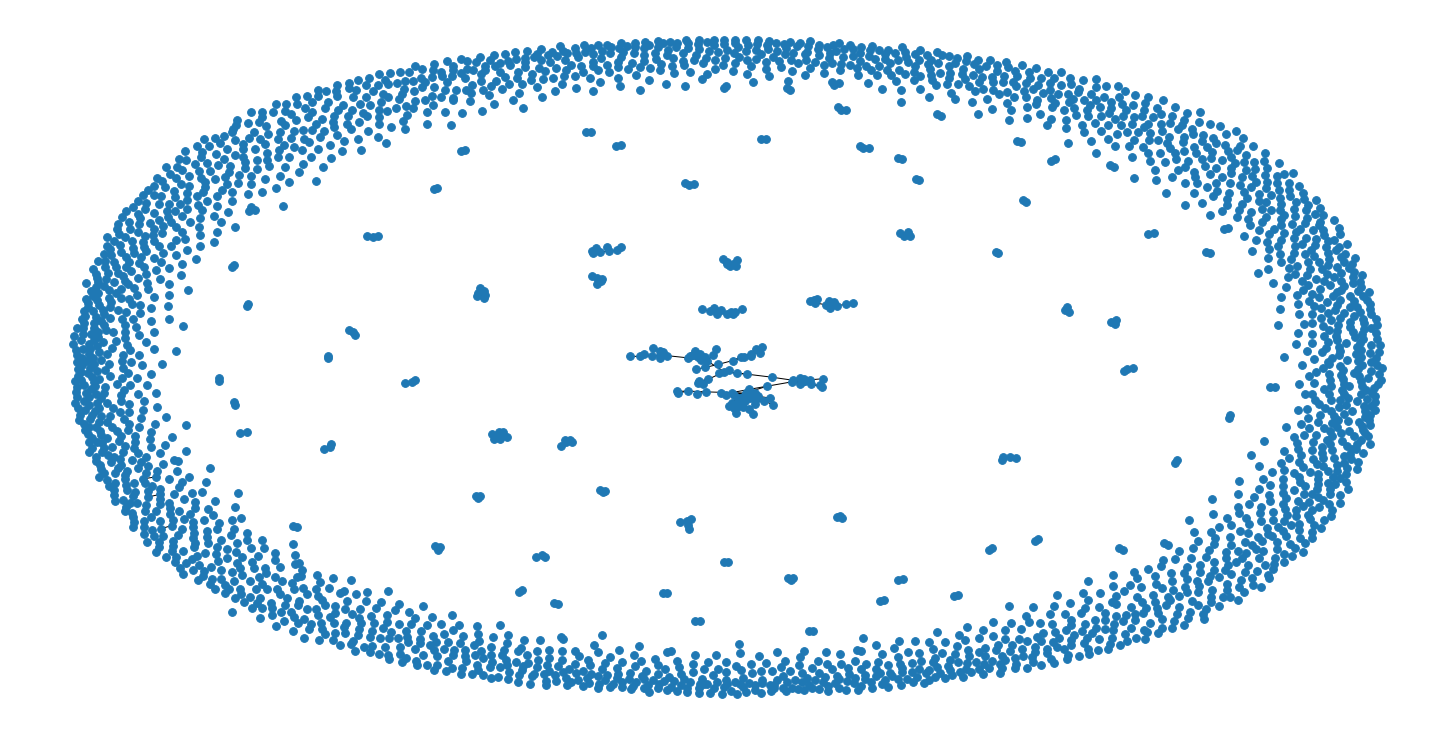

In [73]:
#plot the Graph
nx.draw(G,node_size=60)
plt.show()

In [74]:
from networkx import find_cliques
from networkx.algorithms.community import *

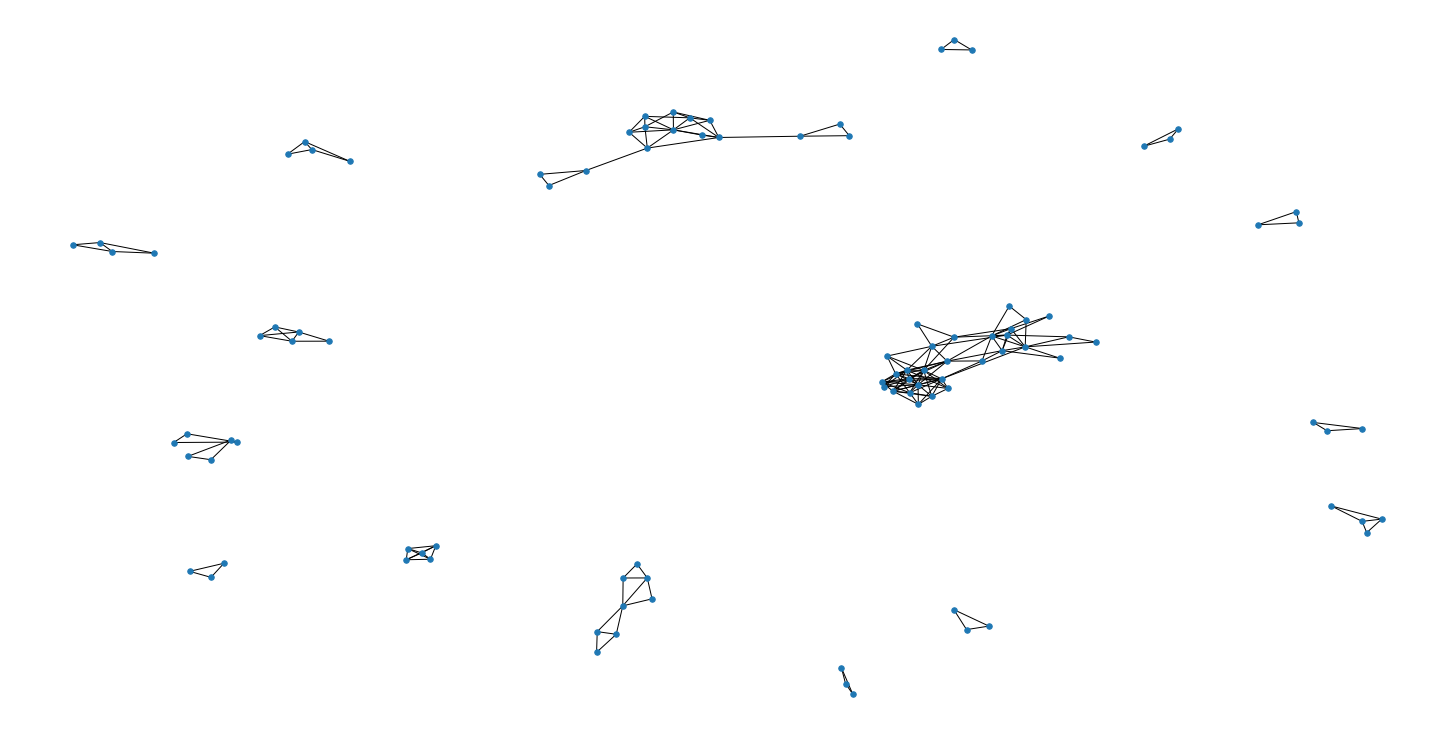

In [75]:
#plot communities with k>=3
cliques = nx.find_cliques(G)
cliques3 = [clq for clq in cliques if len(clq) >= 3]
nodes = set(n for clq in cliques3 for n in clq)
h = G.subgraph(nodes)
k = h.subgraph(nodes)
nx.draw(k, with_labels = False,node_size=30)

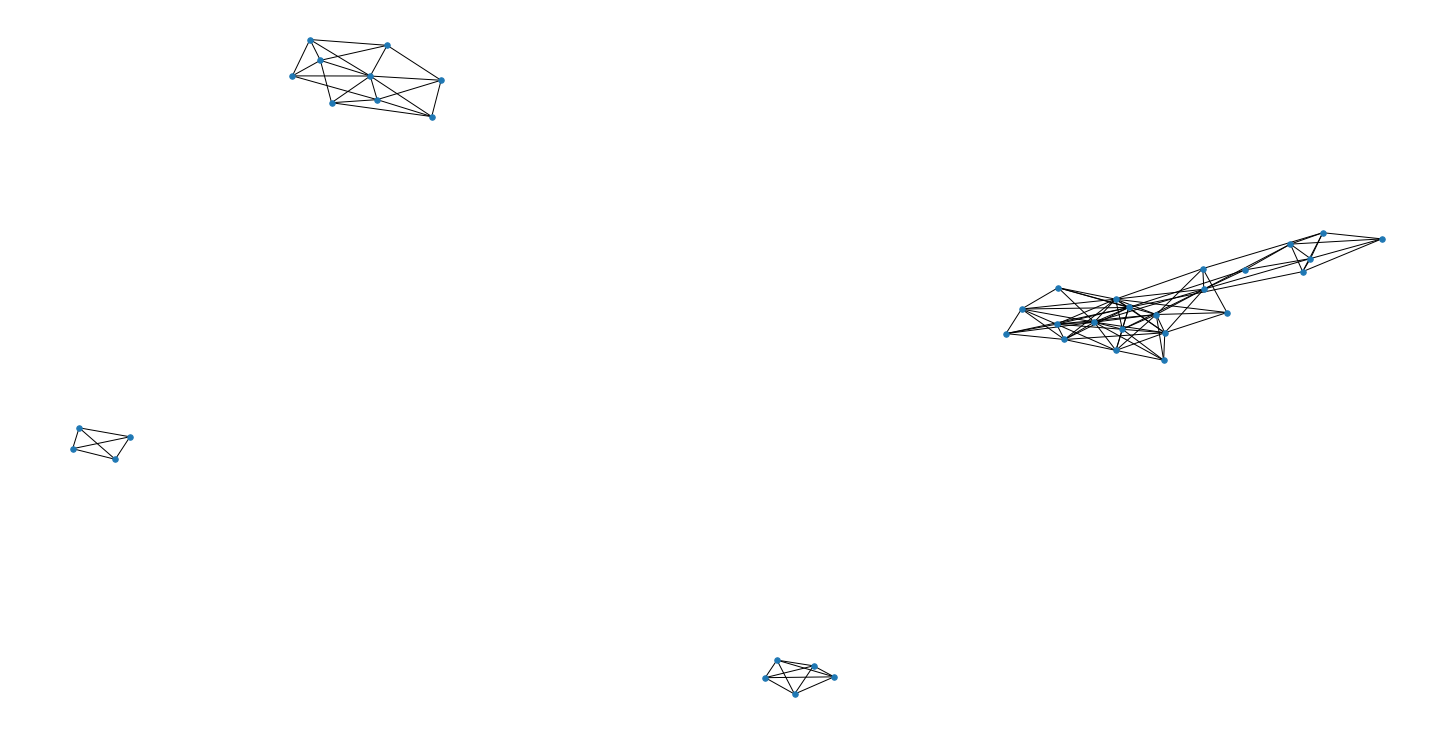

In [76]:
#plot communities with k>=4
cliques = nx.find_cliques(G)
cliques4 = [clq for clq in cliques if len(clq) >= 4]
nodes = set(n for clq in cliques4 for n in clq)
h = G.subgraph(nodes)
k = h.subgraph(nodes)
nx.draw(k, with_labels = False,node_size=30)

In [79]:
#set the edge weights in order to drop some edges
edge_weights = nx.get_edge_attributes(G,'weight')
edge_weights

{(5, 397.0): 0.6371488571166992,
 (50, 650.0): 0.6383110284805298,
 (56, 935.0): 0.6028217077255249,
 (58, 161.0): 0.6669120788574219,
 (77, 835.0): 0.6228548288345337,
 (98, 796.0): 0.6160581707954407,
 (122, 778.0): 0.6093215942382812,
 (167, 870.0): 0.7099488973617554,
 (170, 577.0): 0.6070165634155273,
 (174, 631.0): 0.6062785387039185,
 (174, 175.0): 0.6485532522201538,
 (175, 631.0): 0.6324973106384277,
 (181, 1732.0): 0.6113165616989136,
 (181, 1301.0): 0.6184384822845459,
 (181, 1964.0): 0.62842857837677,
 (181, 1816.0): 0.6331332921981812,
 (210, 868.0): 0.6741536855697632,
 (213, 461.0): 0.611432671546936,
 (224, 487.0): 0.6443477869033813,
 (237, 835.0): 0.6142755150794983,
 (281, 868.0): 0.6095367670059204,
 (283, 826.0): 0.6027731895446777,
 (283, 558.0): 0.6061575412750244,
 (283, 557.0): 0.6065253019332886,
 (285, 502.0): 0.6008176207542419,
 (285, 550.0): 0.6261104345321655,
 (366, 701.0): 0.6099507808685303,
 (375, 462.0): 0.6074407696723938,
 (375, 376.0): 0.610641717

In [80]:
#remove all edges with weight < 0.65 (similarity <0.65)
G.remove_edges_from((e for e, z in edge_weights.items() if z < 0.65))

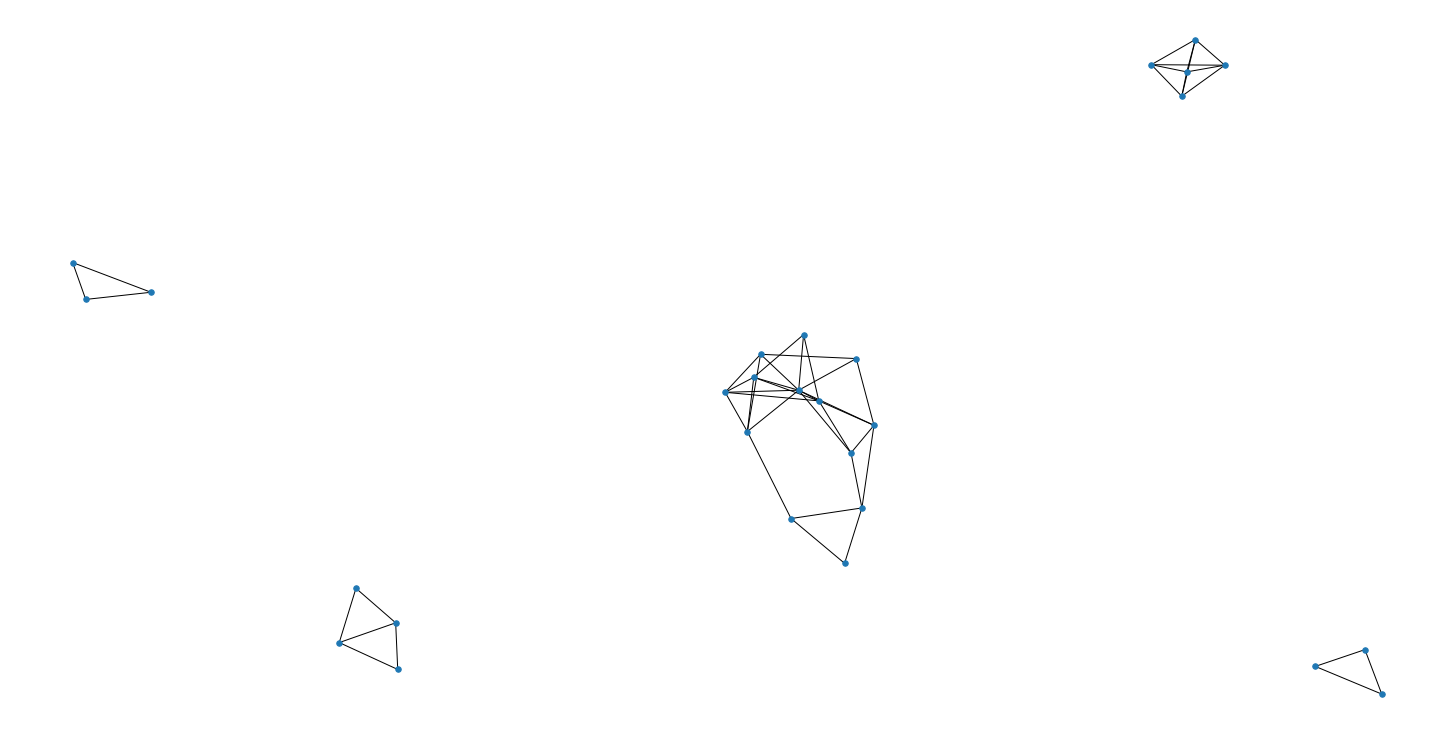

In [81]:
#plot communities with k>=3
cliques = nx.find_cliques(G)
cliques3 = [clq for clq in cliques if len(clq) >= 3]
nodes = set(n for clq in cliques3 for n in clq)
h = G.subgraph(nodes)
k = h.subgraph(nodes)
nx.draw(k, with_labels = False,node_size=30)

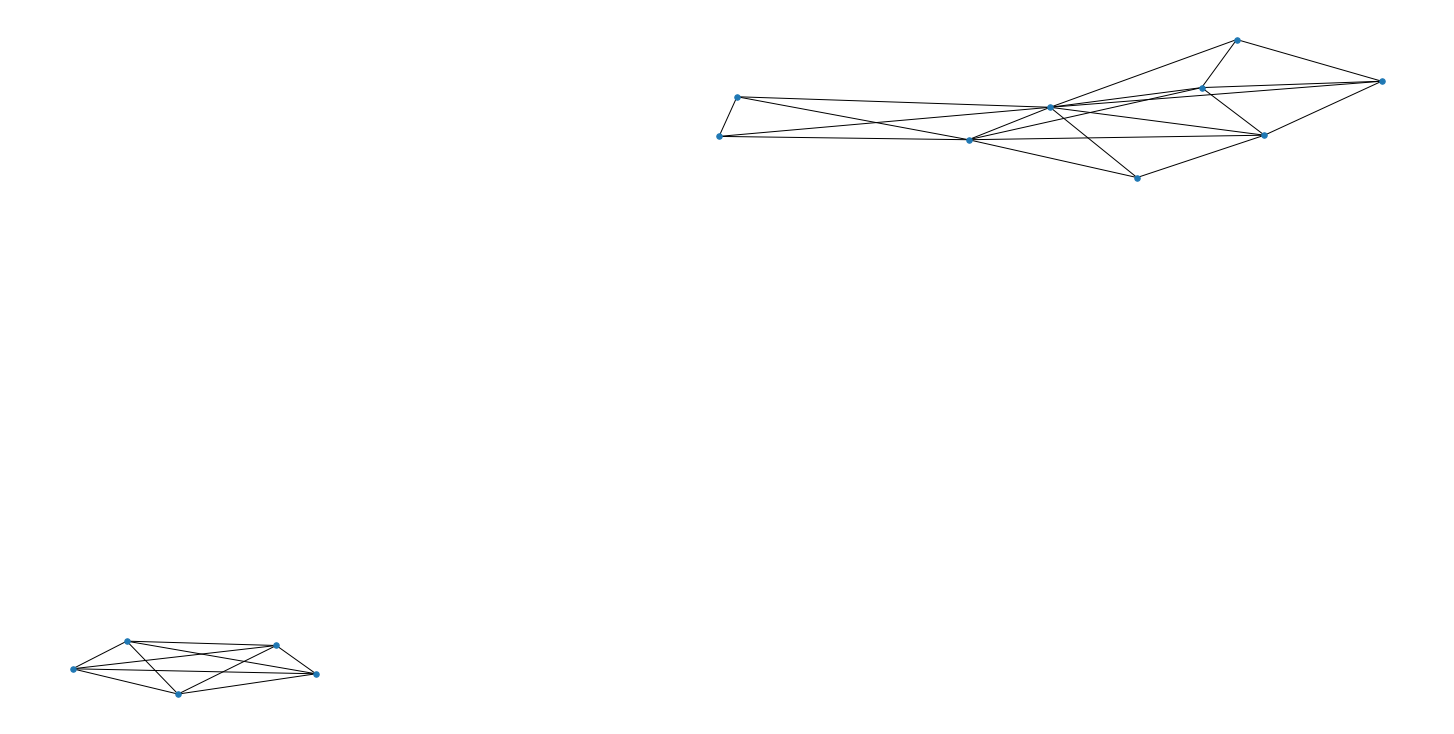

In [82]:
#plot communities with k>=4
cliques = nx.find_cliques(G)
cliques4 = [clq for clq in cliques if len(clq) >= 4]
nodes = set(n for clq in cliques4 for n in clq)
h = G.subgraph(nodes)
k = h.subgraph(nodes)
nx.draw(k, with_labels = False,node_size=30)

In [84]:
#remove all edges with weight < 0.7 (similarity <0.7)
G.remove_edges_from((e for e, z in edge_weights.items() if z < 0.7))

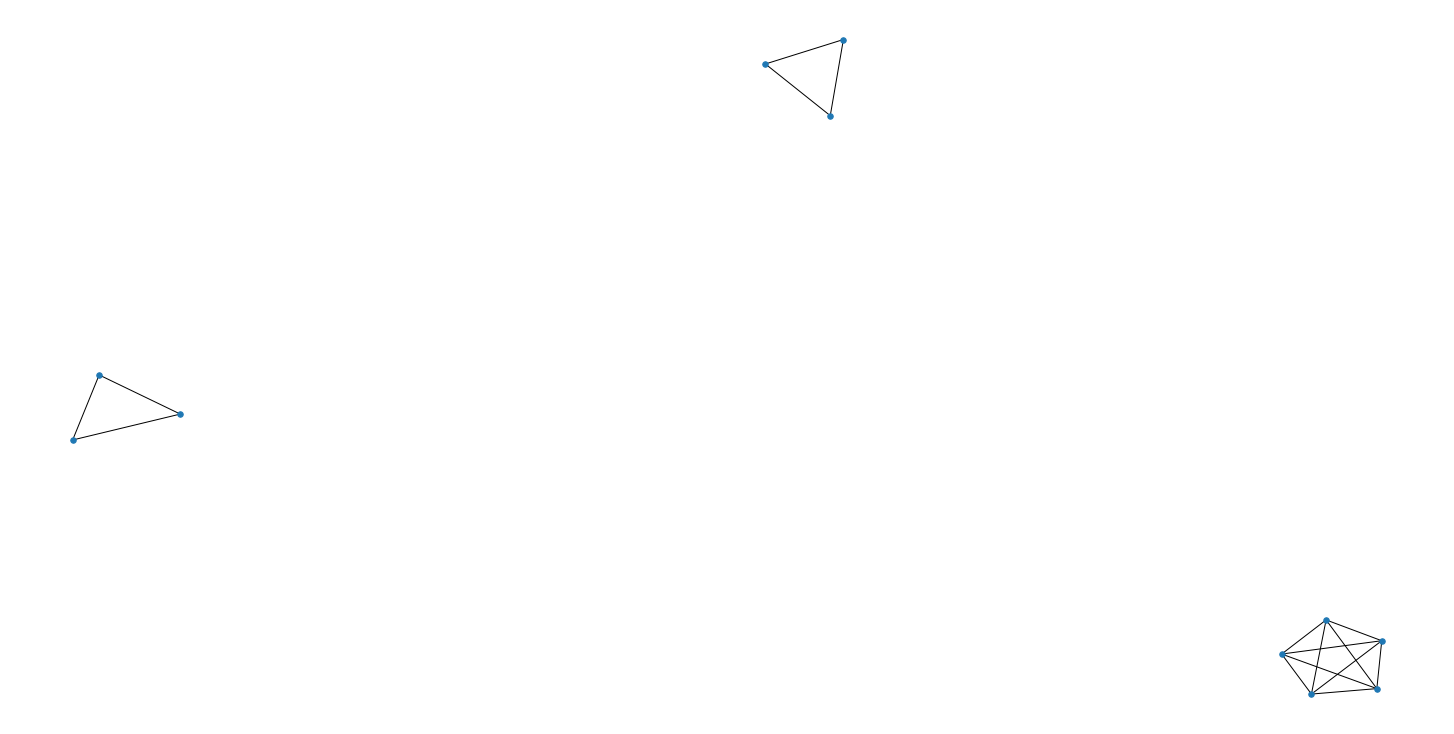

In [85]:
#plot communities with k>=3
cliques = nx.find_cliques(G)
cliques3 = [clq for clq in cliques if len(clq) >= 3]
nodes = set(n for clq in cliques3 for n in clq)
h = G.subgraph(nodes)
k = h.subgraph(nodes)
nx.draw(k, with_labels = False,node_size=30)

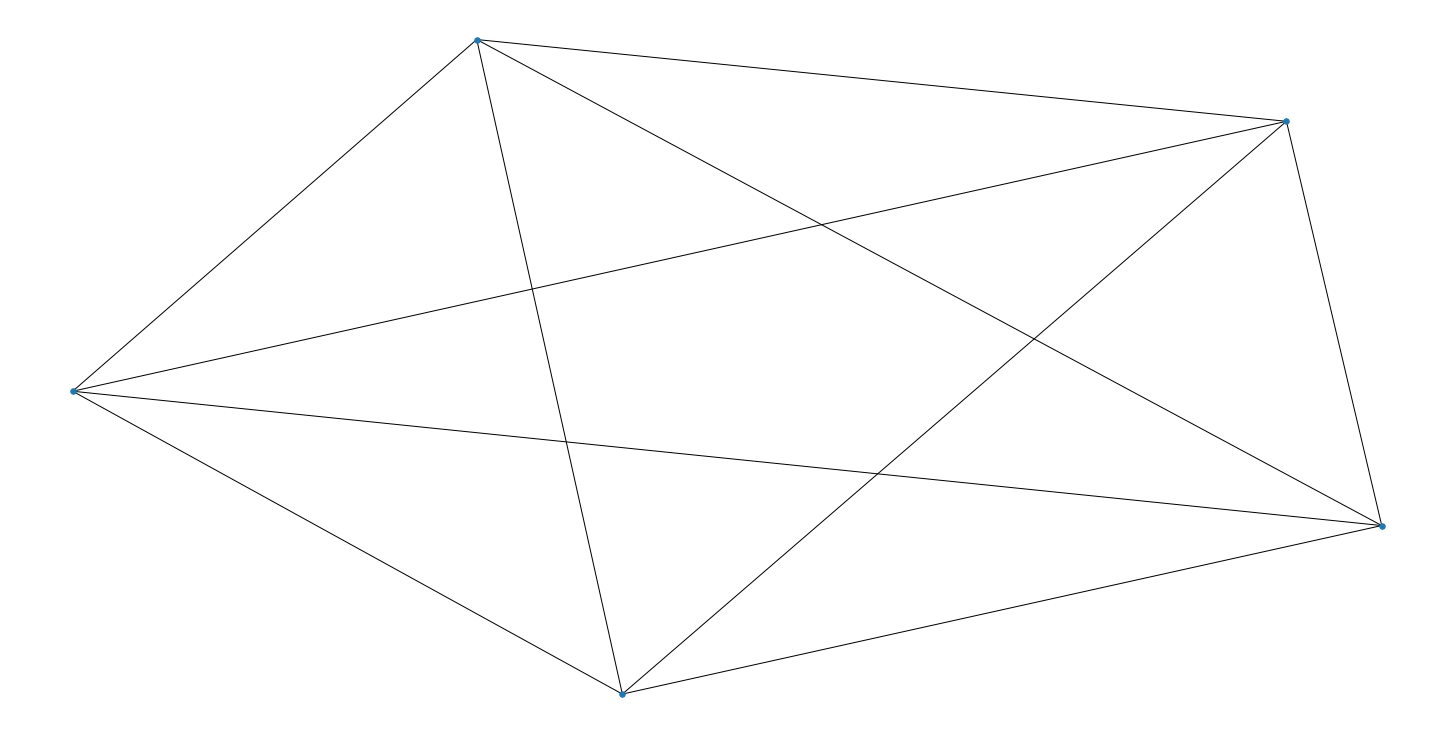

In [86]:
#plot communities with k>=4
cliques = nx.find_cliques(G)
cliques4 = [clq for clq in cliques if len(clq) >= 4]
nodes = set(n for clq in cliques4 for n in clq)
h = G.subgraph(nodes)
k = h.subgraph(nodes)
nx.draw(k, with_labels = False,node_size=30)